In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
from google.colab import files
uploaded= files.upload()
data=pd.read_csv("train.csv")

Saving train.csv to train (1).csv


In [ ]:
print(data.shape)

(891, 12)


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
value_counts = {}
for column in data.columns:
  value_counts[column] = data[column].value_counts()
data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data=data.drop('Cabin',axis=1)

In [ ]:
# Find the most frequent port (mode) in the Embarked column
most_frequent_port = data['Embarked'].mode()[0]
# Fill missing Embarked values with the most frequent port
data['Embarked'].fillna(most_frequent_port, inplace=True)

In [ ]:
mean_value=data['Age'].mean()
print(mean_value)

29.69911764705882


In [ ]:
data['Age'].fillna(mean_value,inplace=True)

In [ ]:
data.duplicated(subset='PassengerId').sum()

0

In [ ]:
#checking for outliers and removing outliers
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.style.use('ggplot')
# Define a custom color palette with darker shades of blue
custom_palette = sns.color_palette("Blues_d")
sns.set_palette(custom_palette)
# Function to check for outliers by plotting
def outlier_plot_box(data, column_name,ax=None):
    sns.boxplot(x=data[column_name], ax=ax)

# Function to remove outliers
def remove_outliers(data1, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(data[col]))
        data1 = data1[(z_scores < threshold)]
    return data1

# Function to plot outliers before and after removal
def plot_outliers_before_and_after(data, numerical_columns, threshold=3):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(10, len(numerical_columns) * 6))

    for i, column in enumerate(numerical_columns):
        ax1 = axes[i][0]
        ax2 = axes[i][1]

        # Plot boxplot before removing outliers
        outlier_plot_box(data, column, ax=ax1)
        ax1.set_title(f"{column} Distribution (Before)")

        # Remove outliers
        df_cleaned = remove_outliers(data, [column], threshold=threshold)

        # Plot boxplot after removing outliers
        outlier_plot_box(df_cleaned, column, ax=ax2)
        ax2.set_title(f"{column} Distribution (After)")

    plt.tight_layout()
    plt.show()

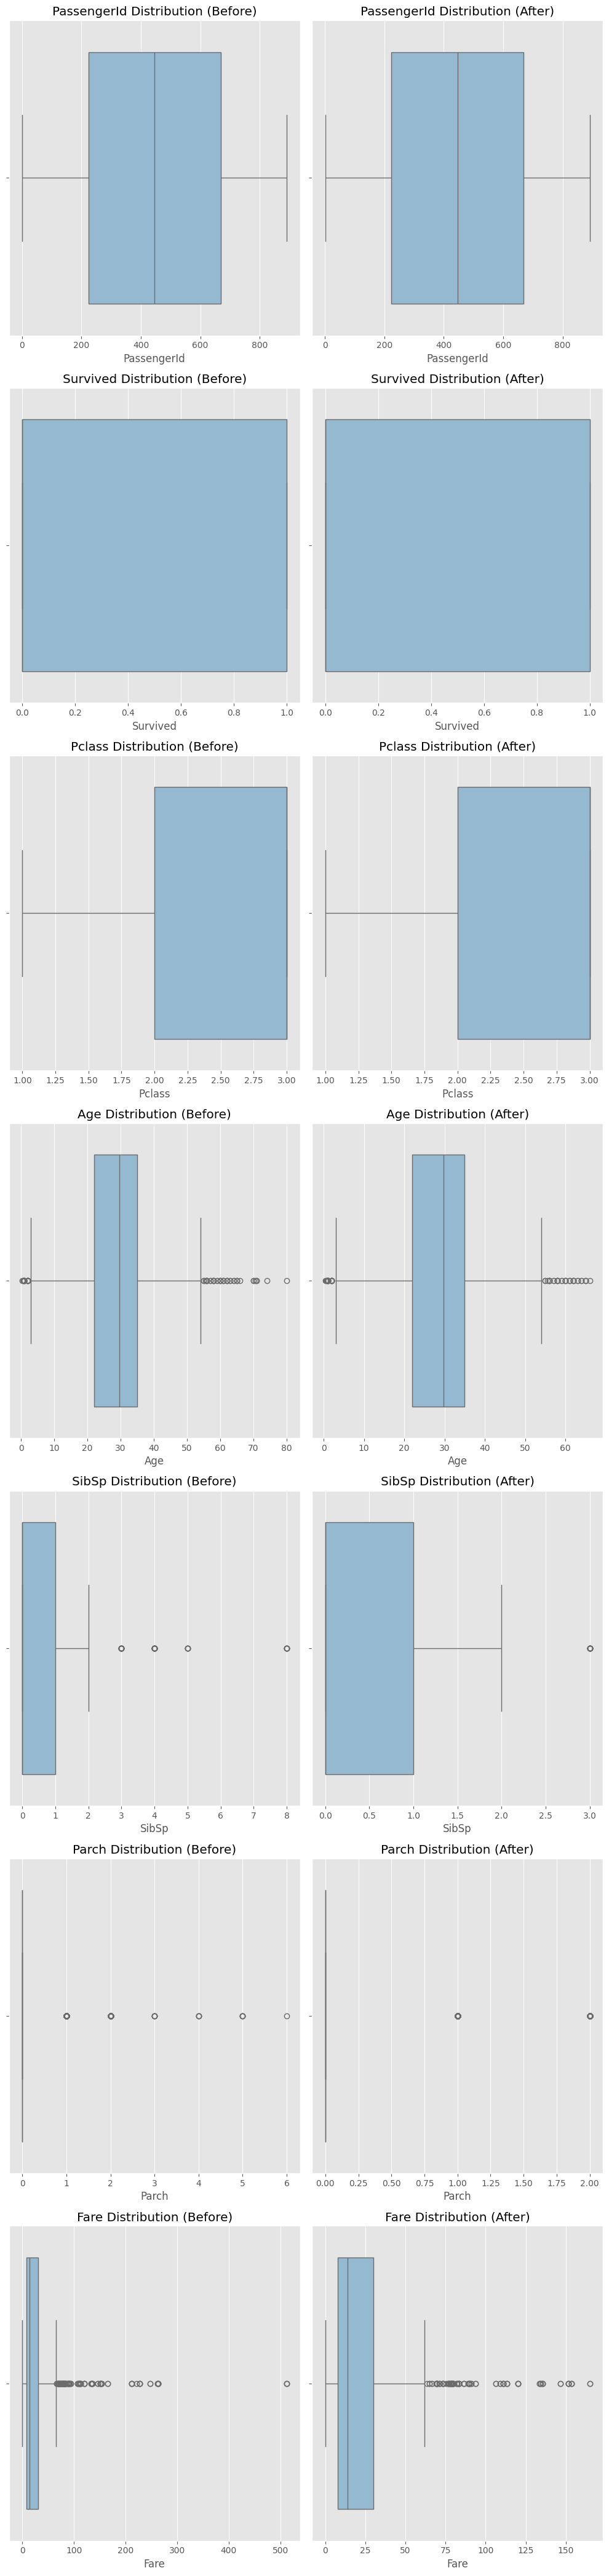

In [ ]:
# Call the function to plot outliers before and after removal
plot_outliers_before_and_after(data, numerical_columns)

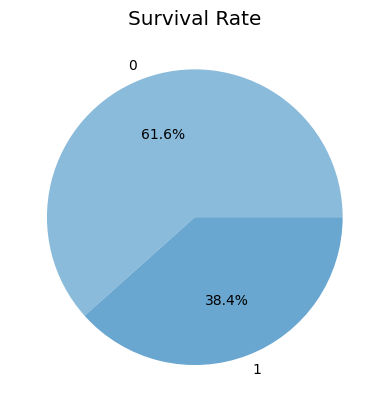

<Figure size 1500x1000 with 0 Axes>

In [23]:


# Plot of Survival Rate
def plot_survival_rate(data):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(data['Survived'].value_counts(), labels=data['Survived'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('Survival Rate')

    # Show the plot
    plt.figure(figsize=(15,10))
    plt.show()
plot_survival_rate(data)

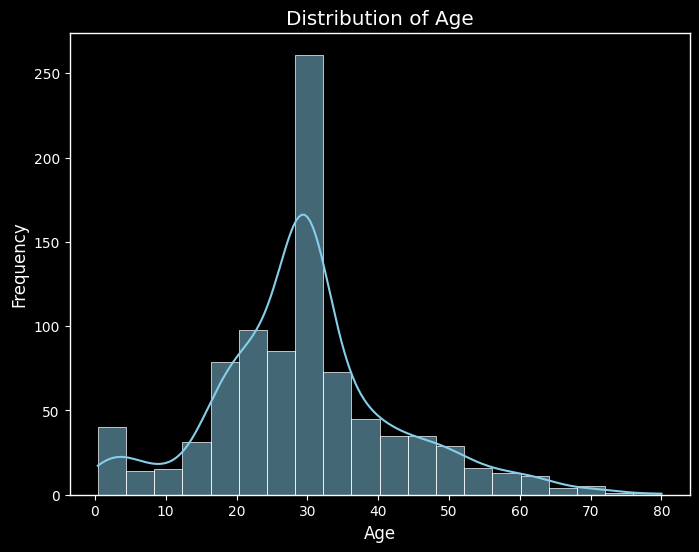

In [24]:
# Histogram for Age
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
ax=sns.histplot(data=data,x='Age', bins=20, kde=True, color='skyblue')
ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

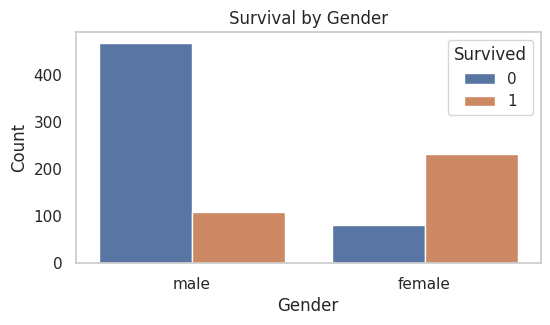

In [39]:
plt.figure(figsize=(6, 3))
ax=sns.countplot(data=data, x="Sex", hue="Survived")
ax.grid(False)
sns.set(style='whitegrid')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")
plt.show()

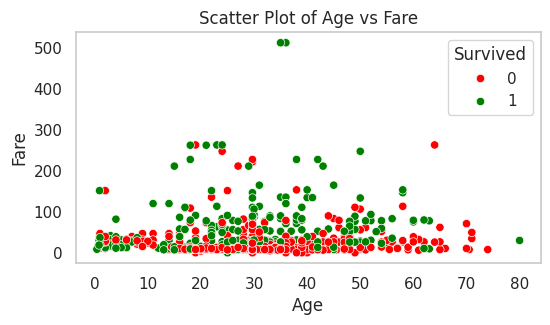

In [36]:
plt.figure(figsize=(6, 3))
custom_palette = {0: 'red', 1: 'green'}
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax=sns.scatterplot(data=data, x="Age", y="Fare",hue="Survived",palette=custom_palette)
ax.grid(False)
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()